In [4]:
import pandas as pd
final_df = pd.read_csv('../../data/GAN2_1_dataset.csv')

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = final_df.drop(columns=['HY_YN'])  # Drop target variable from features
y = final_df['HY_YN']  # Define target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)


Logistic Regression Model Evaluation:
Accuracy: 0.8799009492364837

Confusion Matrix:
 [[4162  429]
 [ 444 2234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      4591
           1       0.84      0.83      0.84      2678

    accuracy                           0.88      7269
   macro avg       0.87      0.87      0.87      7269
weighted avg       0.88      0.88      0.88      7269

ROC-AUC Score: 0.9363746063547067


In [6]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_model.coef_[0]
})

# Sort by absolute importance for easier interpretation
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance[['Feature', 'Importance']])


# calculate r^2 value of log regression model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)



Feature Importance:
              Feature  Importance
21       H_APOP_YN_1  -41.918206
22      H_HDISE_YN_1   18.282752
12        SMK_STAT_2   -1.175847
0                AGE   -1.094031
9                MAP    0.987063
18            EXER_2   -0.955950
10             SEX_2   -0.636455
14      DRNK_HABIT_2   -0.373725
13        SMK_STAT_3   -0.305931
16      DRNK_HABIT_4   -0.236934
19            EXER_3   -0.189479
8   Liver_Enzyme_Avg    0.180941
15      DRNK_HABIT_3   -0.153182
2          TOT_CHOLE    0.143764
17      DRNK_HABIT_5   -0.143261
11        SMK_STAT_1   -0.114503
7                BMI    0.093412
4            SCR_CNT    0.064187
3          GAMMA_GTP   -0.055970
20            EXER_5   -0.055802
6          T_OUT_LOS   -0.041521
1               BLDS   -0.039198
5           T_IN_LOS   -0.008619
R^2 Score: 0.48385580516089133


C:\Users\James\AppData\Local\Temp\ipykernel_22736\3597253738.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


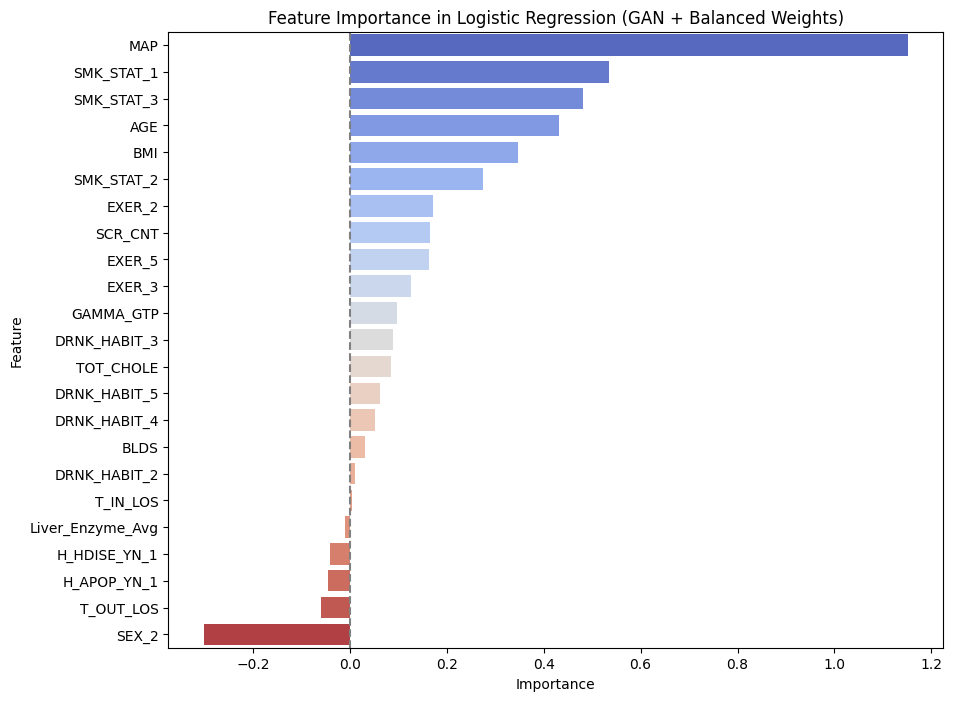

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data is already in a DataFrame named `feature_importance_df`
# Sort features by importance for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': ['MAP', 'SMK_STAT_1', 'SMK_STAT_3', 'AGE', 'BMI', 'SEX_2', 'SMK_STAT_2', 'EXER_2', 
                'SCR_CNT', 'EXER_5', 'EXER_3', 'GAMMA_GTP', 'DRNK_HABIT_3', 'TOT_CHOLE', 'DRNK_HABIT_5', 
                'T_OUT_LOS', 'DRNK_HABIT_4', 'H_APOP_YN_1', 'H_HDISE_YN_1', 'BLDS', 'DRNK_HABIT_2', 
                'Liver_Enzyme_Avg', 'T_IN_LOS'],
    'Importance': [1.152132, 0.535164, 0.481705, 0.432091, 0.346257, -0.301535, 0.275665, 0.172331, 
                   0.164877, 0.164453, 0.126504, 0.097998, 0.088830, 0.085273, 0.062361, -0.060400, 
                   0.052021, -0.044410, -0.040690, 0.031475, 0.011358, -0.008990, 0.003960]
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='coolwarm'
)
plt.title("Feature Importance in Logistic Regression (GAN + Balanced Weights)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.axvline(x=0, color='grey', linestyle='--')  # Line at zero for positive/negative distinction
plt.show()


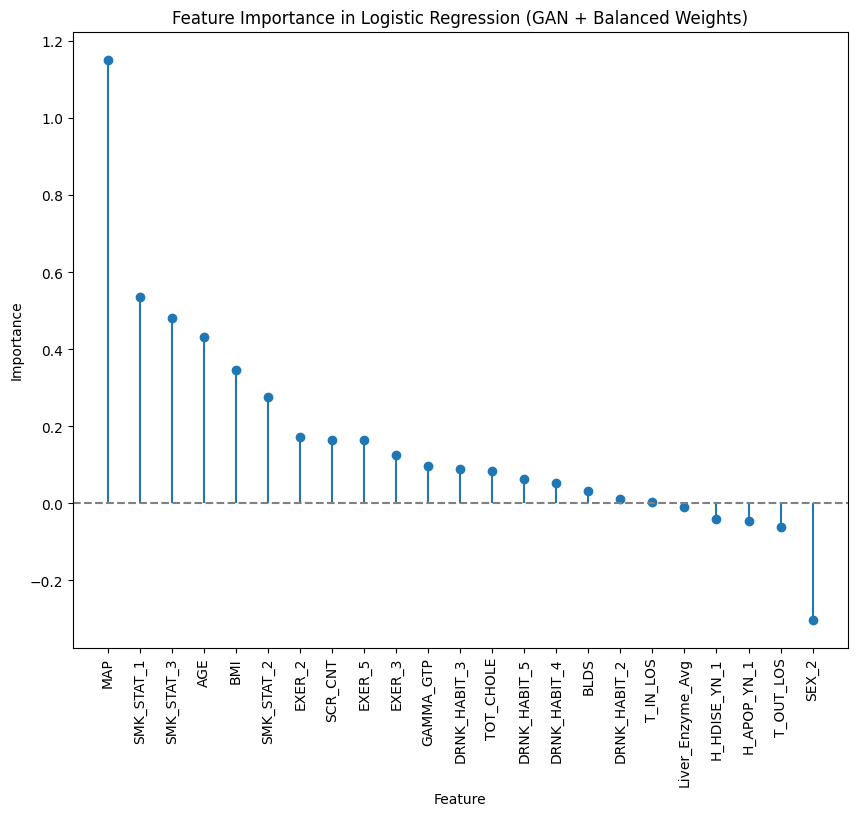

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Feature Importance (Assuming it's in a DataFrame as per your example)
feature_importance_df = pd.DataFrame({
    'Feature': ['MAP', 'SMK_STAT_1', 'SMK_STAT_3', 'AGE', 'BMI', 'SEX_2', 'SMK_STAT_2', 'EXER_2', 
                'SCR_CNT', 'EXER_5', 'EXER_3', 'GAMMA_GTP', 'DRNK_HABIT_3', 'TOT_CHOLE', 'DRNK_HABIT_5', 
                'T_OUT_LOS', 'DRNK_HABIT_4', 'H_APOP_YN_1', 'H_HDISE_YN_1', 'BLDS', 'DRNK_HABIT_2', 
                'Liver_Enzyme_Avg', 'T_IN_LOS'],
    'Importance': [1.152132, 0.535164, 0.481705, 0.432091, 0.346257, -0.301535, 0.275665, 0.172331, 
                   0.164877, 0.164453, 0.126504, 0.097998, 0.088830, 0.085273, 0.062361, -0.060400, 
                   0.052021, -0.044410, -0.040690, 0.031475, 0.011358, -0.008990, 0.003960]
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Lollipop Chart
plt.figure(figsize=(10, 8))
plt.stem(
    feature_importance_df['Feature'], 
    feature_importance_df['Importance'], 
    basefmt=" "  # No baseline
)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression (GAN + Balanced Weights)")
plt.axhline(y=0, color='grey', linestyle='--')  # Line at zero for positive/negative distinction
plt.show()


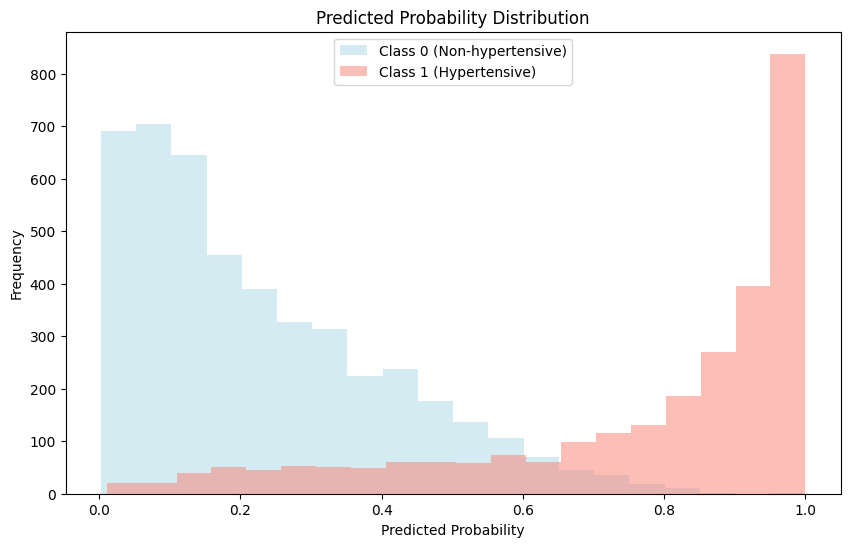

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label="Class 0 (Non-hypertensive)", color="lightblue")
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label="Class 1 (Hypertensive)", color="salmon")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probability Distribution")
plt.legend(loc="upper center")
plt.show()


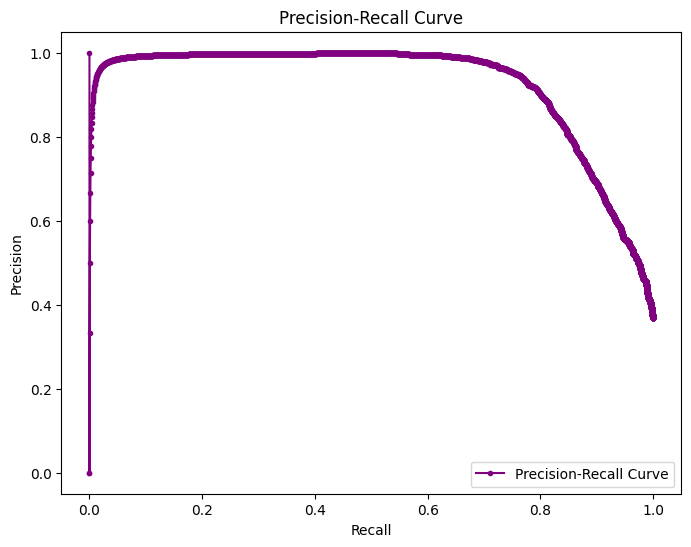

In [10]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='purple', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
